# **Single class sensitivity analysis: what the classifying layer may show**

## Navigation

- [**Basic imports and initialization**](#Basic-imports-and-initialization)
- [**1. Alexnet**](#1.-Alexnet)
- [**2. VGG11**](#2.-VGG11)
- [**3. ResNet18**](#3.-ResNet18)

## Basic imports and initialization

$\qquad$ [[Back to top]](#Navigation) $\qquad$ [[Next part $\to$]](#1.-Alexnet)

- [Setting up templates, limiting the hardware resources, importing packages](#Setting-up-templates,-limiting-the-hardware-resources,-importing-packages)
- [Initializing common variables](#Initializing-common-variables)
- [Configuring experiments and generating corresponding sh-files](#Configuring-experiments-and-generating-corresponding-sh-files)

### Setting up templates, limiting the hardware resources, importing packages

$\quad$[[Back to section]](#Basic-imports-and-initialization)$\quad$[[Next subsect.$\to$]](#Initializing-common-variables)

In [1]:
libstdcpp_path = ''

In the case of problems with loading ```libstc++.so.6```, please provide the path to the library. In any other case, just ignore the following block.

In [2]:
import ctypes

libstdcpp_path = '/mnt/bulky/pkharyuk/apd/envs/activation_sense/lib/libstdc++.so.6'
try:
    _stdcxx_lib = ctypes.cdll.LoadLibrary(libstdcpp_path)
except:
    pass

To provide easy access to modules stored in the ```../src/``` directory, we use the following workaround:

In [3]:
import sys
sys.path.append('../src/')

Next, we limit the hardware usage by setting the configuration dictionaries, maximum number of threads:

In [4]:
# set limitations on hardware
# fill on the template's config
import hardware_setup

mkl_num_threads = 4
hardware_setup.mkl_set_num_threads(num_threads=mkl_num_threads)

[mkl]: set up num_threads=4/24


Then we import all necessary packages:

In [5]:
import os
import functools

import numpy as np

import sensitivity_analysis.augmentation_setting
import preparation.single_unit
import prediction.compute
import prediction.single_class
import data_loader.imagenet

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

### Initializing common variables

[[$\leftarrow$Prev.subsect.]](#Setting-up-templates,-limiting-the-hardware-resources,-importing-packages)$\quad$[[Back to section]](#Basic-imports-and-initialization)$\quad$[[Next subsect.$\to$]](#Configuring-experiments-and-generating-corresponding-sh-files)

In [6]:
data_dirname = '../data/imagenet'

sensitivity_values_dirname = '../results/'
results_dirname = '../results/'

values_fnm_base = 'imagenet_ILSVRC_values'

no_aug_key = 'original'
y_true_key = 'true_labels'

n_round_digits = 4

alphas = [0., 0.5, 1.5]
percentiles = [0.5, 0.6, 0.7, 0.8, 0.9]
inverts = [0, 1]

augmentation_set_numbers_list = [1, 2]

n_top_values_decay_plot = 20
figsize_decay_plot = (10, 5)

In [7]:
ilsvrc_dataset = data_loader.imagenet.CustomImageNet(data_dirname, split='val')

In [8]:
shpv_group_indices_dict = {}
for aug_set_num in augmentation_set_numbers_list:
    shpv_group_indices_dict[
        aug_set_num
    ] = sensitivity_analysis.augmentation_setting.get_group_variables_indices(
        aug_set_num,
        use_permutation_variable=1,
        use_class_variable=1,
        use_partition_variable=1,
    )

sensitivity_values_name_list = [
    'shpv', 'si'
]
n_sens_vals = len(sensitivity_values_name_list)

augmentation_names_dict = preparation.single_unit.extract_augmentation_names_dict(
    augmentation_set_numbers_list,
    extract_auxilliary_names=False,
)
augmentation_names = functools.reduce(
    lambda x, y: x+y, augmentation_names_dict.values()
)

## 1. Alexnet

[[$\leftarrow$ Prev.part]](#Basic-imports-and-initialization) $\qquad$ [[Back to top]](#Navigation) $\qquad$ [[Next part $\to$]](#2.-VGG11)


- [1.1 Set up variables](#1.1-Set-up-variables)
- [1.2 Decay of the top sensitivity values](#1.2-Decay-of-the-top-sensitivity-values)
- [1.3 Top sensitivity values and corresponding classes](#1.3-Top-sensitivity-values-and-corresponding-classes)
- [1.4 Jaccard indices for top-5 predictions and top-5 sensitive classes](#1.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)
- [1.5 Jaccard indices for top-5 masked predictions and top-5 sensitive classes](#1.5-Jaccard-indices-for-top-5-masked-predictions-and-top-5-sensitive-classes)

### 1.1 Set up variables

$\quad$[[Back to section]](#1.-Alexnet)$\quad$[[Next subsect.$\to$]](#1.2-Decay-of-the-top-sensitivity-values)

In [9]:
alexnet_network_name = 'alexnet'
alexnet_classifying_layer_name = 'classifier.6'

prediction_results_path_nofcl_list = [
    os.path.join(
        results_dirname, f'{val_name}_{alexnet_network_name}_{values_fnm_base}_pred_NOFCL_part=valid.hdf5'
    ) for val_name in sensitivity_values_name_list
]

alexnet_values_fnms_dict = preparation.single_unit.extract_massive_values_fnms(
    alexnet_network_name,
    values_fnm_base,
    augmentation_set_numbers_list,
    prefix=None
);

alexnet_loaded_sensitivity_values_dict_list = []
for sensitivity_values_name in sensitivity_values_name_list:
    loaded_sensitivity_values_dict = prediction.compute.get_all_values(
        alexnet_values_fnms_dict,
        results_dirname,
        [alexnet_classifying_layer_name],
        sensitivity_values_name,
        augmentation_set_numbers_list,
        shpv_group_indices_dict,
        extract_auxilliary_names=False,
    )
    alexnet_loaded_sensitivity_values_dict_list.append(
        loaded_sensitivity_values_dict
    )

### 1.2 Decay of the top sensitivity values

[[$\leftarrow$Prev.subsect.]](#1.1-Set-up-variables)$\quad$[[Back to section]](#1.-Alexnet)$\quad$[[Next subsect.$\to$]](#1.3-Top-sensitivity-values-and-corresponding-classes)

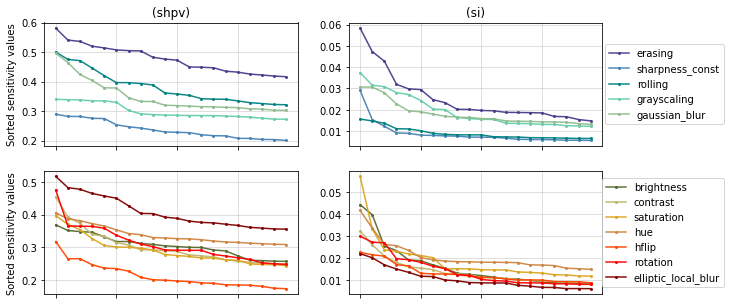

In [10]:
prediction.single_class.plot_top_sensitivity_values_decay(
    alexnet_loaded_sensitivity_values_dict_list,
    alexnet_classifying_layer_name,
    sensitivity_values_name_list,
    augmentation_set_numbers_list,
    n_top_values=n_top_values_decay_plot,
    figsize=figsize_decay_plot,
    extract_auxilliary_names=False,
    plot_colors=prediction.single_class._custom_colors[::-1],
    show=True,
)

### 1.3 Top sensitivity values and corresponding classes

[[$\leftarrow$Prev.subsect.]](#1.2-Decay-of-the-top-sensitivity-values)$\quad$[[Back to section]](#1.-Alexnet)$\quad$[[Next subsect.$\to$]](#1.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)

In [11]:
table_dict = prediction.single_class.extract_tables_top_sensitivity_values_decay(
    alexnet_loaded_sensitivity_values_dict_list,
    alexnet_classifying_layer_name,
    sensitivity_values_name_list,
    augmentation_set_numbers_list,
    ilsvrc_dataset.ind2class,
    n_top_values=10,
    extract_auxilliary_names=False,
)

In [12]:
for aug_name in augmentation_names:
    print(f'\n\t\t\t Augmentation: {aug_name}')
    display(table_dict[aug_name])


			 Augmentation: erasing


shpv                                                     si  \
  class_id                              class_name value class_id   
0       62   rock python, rock snake, Python sebae   .58      782   
1      635                        magnetic compass   .54      851   
2      623  letter opener, paper knife, paperknife   .54      664   
3      641                                  maraca   .52      626   
4      618                                   ladle   .51      708   
5      910                            wooden spoon   .51      412   
6       26          common newt, Triturus vulgaris   .50      681   
7      840                         swab, swob, mop   .50      907   
8      242                                   boxer   .48      711   
9      857                                  throne   .48      876   

                                                            
                                          class_name value  
0                                 screen, CRT screen   .06  
1                      television, television system   .05  
2                                            monitor   .04  
3                   lighter, light, igniter, ignitor   .03  
4                        pedestal, plinth, footstall   .03  
5  ashcan, trash can, garbage can, wastebin, ash ...   .03  
6                        notebook, notebook computer   .02  
7                                        wine bottle   .02  
8                                   perfume, essence   .02  
9                                           tub, vat   .02


			 Augmentation: sharpness_const


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      497                            church, church building   .29      252   
1      421  bannister, banister, balustrade, balusters, ha...   .28      767   
2       92                                          bee eater   .28      542   
3      304                           leaf beetle, chrysomelid   .28      822   
4      689                                          overskirt   .27      246   
5      294                    brown bear, bruin, Ursus arctos   .25      343   
6      932                                            pretzel   .25      181   
7      472                                              canoe   .24      208   
8      980                                            volcano   .24      805   
9      323  monarch, monarch butterfly, milkweed butterfly...   .23      437   

                                                     
                                   class_name value  
0  affenpinscher, monkey pinscher, monkey dog   .03  
1        rubber eraser, rubber, pencil eraser   .02  
2                                   drumstick   .01  
3                                  steel drum   .01  
4                                  Great Dane   .01  
5                                     warthog   .01  
6                          Bedlington terrier   .01  
7                          Labrador retriever   .01  
8                                 soccer ball   .01  
9    beacon, lighthouse, beacon light, pharos   .01


			 Augmentation: rolling


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      935                                      mashed potato   .50      240   
1      103  platypus, duckbill, duckbilled platypus, duck-...   .48      884   
2      474                                           cardigan   .47      324   
3      516                                             cradle   .45      579   
4      936                                       head cabbage   .42      540   
5      408                      amphibian, amphibious vehicle   .40      584   
6      522                                       croquet ball   .40      674   
7      209                           Chesapeake Bay retriever   .39      841   
8      880                                unicycle, monocycle   .39       73   
9      952                                                fig   .36      688   

                                                            
                                          class_name value  
0                                        Appenzeller   .02  
1                                              vault   .01  
2                                  cabbage butterfly   .01  
3                                 grand piano, grand   .01  
4                    drilling platform, offshore rig   .01  
5                                         hair slide   .01  
6                                          mousetrap   .01  
7                                         sweatshirt   .01  
8                     barn spider, Araneus cavaticus   .01  
9  oscilloscope, scope, cathode-ray oscilloscope,...   .01


			 Augmentation: grayscaling


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      215                                   Brittany spaniel   .34       31   
1      852                                        tennis ball   .34      252   
2      734  police van, police wagon, paddy wagon, patrol ...   .34      230   
3      115                               sea slug, nudibranch   .33      657   
4      218                             Welsh springer spaniel   .33      851   
5       90                                           lorikeet   .33      424   
6      390                                                eel   .30      423   
7      797                                       sleeping bag   .29      653   
8      130                                           flamingo   .29      747   
9       97                                              drake   .29      862   

                                                            
                                          class_name value  
0                               tree frog, tree-frog   .04  
1         affenpinscher, monkey pinscher, monkey dog   .03  
2    Shetland sheepdog, Shetland sheep dog, Shetland   .03  
3                                            missile   .03  
4                      television, television system   .03  
5                                         barbershop   .02  
6                                       barber chair   .02  
7                                           milk can   .02  
8  punching bag, punch bag, punching ball, punchball   .02  
9                                              torch   .02


			 Augmentation: gaussian_blur


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      643                                               mask   .50      412   
1      273             dingo, warrigal, warragal, Canis dingo   .46      252   
2      136            European gallinule, Porphyrio porphyrio   .42      876   
3      391  coho, cohoe, coho salmon, blue jack, silver sa...   .40      463   
4      809                                          soup bowl   .38      438   
5      529                              diaper, nappy, napkin   .38       47   
6      460  breakwater, groin, groyne, mole, bulwark, seaw...   .35      425   
7      319  dragonfly, darning needle, devil's darning nee...   .33      626   
8      901                                        whiskey jug   .33        1   
9       30                         bullfrog, Rana catesbeiana   .32      164   

                                                            
                                          class_name value  
0  ashcan, trash can, garbage can, wastebin, ash ...   .03  
1         affenpinscher, monkey pinscher, monkey dog   .03  
2                                           tub, vat   .03  
3                                       bucket, pail   .02  
4                                             beaker   .02  
5            African chameleon, Chamaeleo chamaeleon   .02  
6                                               barn   .02  
7                   lighter, light, igniter, ignitor   .02  
8                        goldfish, Carassius auratus   .02  
9                                           bluetick   .02


			 Augmentation: brightness


shpv                                                         si  \
  class_id                                  class_name value class_id   
0      596                                     hatchet   .37      178   
1       63                     Indian cobra, Naja naja   .35      637   
2      655                             miniskirt, mini   .35      105   
3      214                               Gordon setter   .35       43   
4      729                                  plate rack   .33      687   
5      828                                    strainer   .32       77   
6      418     ballpoint, ballpoint pen, ballpen, Biro   .32      317   
7      662                                       modem   .31      648   
8      364  three-toed sloth, ai, Bradypus tridactylus   .31      476   
9      145        king penguin, Aptenodytes patagonica   .30       63   

                                                            
                                          class_name value  
0                                         Weimaraner   .04  
1                                mailbox, letter box   .04  
2  koala, koala bear, kangaroo bear, native bear,...   .03  
3               frilled lizard, Chlamydosaurus kingi   .02  
4                                  organ, pipe organ   .02  
5                        wolf spider, hunting spider   .02  
6                                         leafhopper   .02  
7                   medicine chest, medicine cabinet   .02  
8  carousel, carrousel, merry-go-round, roundabou...   .01  
9                            Indian cobra, Naja naja   .01


			 Augmentation: contrast


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      529                              diaper, nappy, napkin   .45      313   
1      341            hog, pig, grunter, squealer, Sus scrofa   .39       98   
2      253                                            basenji   .37      707   
3      225                                           malinois   .34      488   
4       49  African crocodile, Nile crocodile, Crocodylus ...   .33      806   
5       99                                              goose   .31      609   
6      273             dingo, warrigal, warragal, Canis dingo   .31      608   
7      171                                  Italian greyhound   .29      643   
8      557                                flagpole, flagstaff   .29      128   
9      675                                         moving van   .29      888   

                                                    
                                  class_name value  
0  walking stick, walkingstick, stick insect   .03  
1    red-breasted merganser, Mergus serrator   .03  
2                     pay-phone, pay-station   .02  
3                                      chain   .02  
4                                       sock   .02  
5                            jeep, landrover   .02  
6                     jean, blue jean, denim   .01  
7                                       mask   .01  
8                 black stork, Ciconia nigra   .01  
9                                    viaduct   .01


			 Augmentation: saturation


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      597                                            holster   .40      958   
1      760                               refrigerator, icebox   .37      500   
2       61           boa constrictor, Constrictor constrictor   .35      384   
3       41                          whiptail, whiptail lizard   .33      665   
4      766                                         rotisserie   .31      328   
5      274                                dhole, Cuon alpinus   .30      676   
6      970                                                alp   .30      148   
7      421  bannister, banister, balustrade, balusters, ha...   .30      764   
8      355                                              llama   .29      608   
9      773                            saltshaker, salt shaker   .28      696   

                                                            
                                          class_name value  
0                                                hay   .06  
1                                     cliff dwelling   .03  
2    indri, indris, Indri indri, Indri brevicaudatus   .02  
3                                              moped   .02  
4                                         sea urchin   .02  
5                                             muzzle   .02  
6  killer whale, killer, orca, grampus, sea wolf,...   .02  
7                                              rifle   .02  
8                             jean, blue jean, denim   .02  
9                                         paintbrush   .02


			 Augmentation: hue


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      164                                           bluetick   .41      178   
1      940                                   spaghetti squash   .39      992   
2      996  hen-of-the-woods, hen of the woods, Polyporus ...   .38      657   
3      163                            bloodhound, sleuthhound   .37      151   
4      242                                              boxer   .37       59   
5      766                                         rotisserie   .35      960   
6      118                    Dungeness crab, Cancer magister   .34       17   
7      386               African elephant, Loxodonta africana   .34      309   
8      375                            colobus, colobus monkey   .33      324   
9        0                                 tench, Tinca tinca   .33      737   

                                           
                         class_name value  
0                        Weimaraner   .04  
1                            agaric   .03  
2                           missile   .03  
3                         Chihuahua   .03  
4                        vine snake   .02  
5  chocolate sauce, chocolate syrup   .02  
6                               jay   .02  
7                               bee   .02  
8                 cabbage butterfly   .02  
9           pop bottle, soda bottle   .02


			 Augmentation: hflip


shpv                                                          si  \
  class_id                                   class_name value class_id   
0      112                                        conch   .32      197   
1      731                    plunger, plumber's helper   .26      657   
2      596                                      hatchet   .26      787   
3      690                                       oxcart   .25      665   
4      627                              limousine, limo   .24      802   
5      343                                      warthog   .23      459   
6      666                                       mortar   .23      575   
7      273       dingo, warrigal, warragal, Canis dingo   .21      231   
8      979                                 valley, vale   .20      164   
9      140  red-backed sandpiper, dunlin, Erolia alpina   .20      840   

                                  
                class_name value  
0          giant schnauzer   .02  
1                  missile   .02  
2          shield, buckler   .02  
3                    moped   .02  
4               snowmobile   .02  
5  brassiere, bra, bandeau   .01  
6      golfcart, golf cart   .01  
7                   collie   .01  
8                 bluetick   .01  
9          swab, swob, mop   .01


			 Augmentation: rotation


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      807         solar dish, solar collector, solar furnace   .48      609   
1      161                               basset, basset hound   .37      529   
2      747  punching bag, punch bag, punching ball, punchball   .36       98   
3      799                                       sliding door   .36      194   
4      460  breakwater, groin, groyne, mole, bulwark, seaw...   .36      317   
5      875                                           trombone   .34      762   
6      201                        silky terrier, Sydney silky   .32      178   
7      954                                             banana   .31      412   
8      268                                   Mexican hairless   .30      236   
9      481                                           cassette   .29      888   

                                                            
                                          class_name value  
0                                    jeep, landrover   .03  
1                              diaper, nappy, napkin   .03  
2            red-breasted merganser, Mergus serrator   .03  
3             Dandie Dinmont, Dandie Dinmont terrier   .02  
4                                         leafhopper   .02  
5     restaurant, eating house, eating place, eatery   .02  
6                                         Weimaraner   .02  
7  ashcan, trash can, garbage can, wastebin, ash ...   .02  
8                        Doberman, Doberman pinscher   .01  
9                                            viaduct   .01


			 Augmentation: elliptic_local_blur


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      344  hippopotamus, hippo, river horse, Hippopotamus...   .52      817   
1      146                               albatross, mollymawk   .48      575   
2      220                                     Sussex spaniel   .48      465   
3       58                                        water snake   .46       72   
4      623             letter opener, paper knife, paperknife   .46      968   
5      341            hog, pig, grunter, squealer, Sus scrofa   .45      744   
6      915                                               yurt   .43      399   
7      173                       Ibizan hound, Ibizan Podenco   .40      932   
8      823                                        stethoscope   .40       59   
9      192                               cairn, cairn terrier   .39      490   

                                                            
                                          class_name value  
0                              sports car, sport car   .02  
1                                golfcart, golf cart   .02  
2                                   bulletproof vest   .02  
3     black and gold garden spider, Argiope aurantia   .02  
4                                                cup   .01  
5                                projectile, missile   .01  
6                                              abaya   .01  
7                                            pretzel   .01  
8                                         vine snake   .01  
9  chain mail, ring mail, mail, chain armor, chai...   .01

### 1.4 Jaccard indices for top-5 predictions and top-5 sensitive classes

[[$\leftarrow$Prev.subsect.]](#1.3-Top-sensitivity-values-and-corresponding-classes)$\quad$[[Back to section]](#1.-Alexnet)$\quad$[[Next subsect.$\to$]](#1.5-Jaccard-indices-for-top-5-masked-predictions-and-top-5-sensitive-classes)

In [13]:
alexnet_sensitivity_topn_list = prediction.single_class.get_sensitivity_topn_dict(
    alexnet_loaded_sensitivity_values_dict_list,
    alexnet_classifying_layer_name,
    augmentation_set_numbers_list,
    top_n=5,
    extract_auxilliary_names=False,
)

alexnet_results_jacc_nofcl_list = []
alexnet_results_jacc_aug_no_mask_list = []
alexnet_results_jacc_orig_no_mask_list = []

for i in range(n_sens_vals):
    (
        alexnet_results_jacc, 
        alexnet_results_jacc_aug_no_mask,
        alexnet_results_jacc_orig_no_mask,
    ) = prediction.single_class.extract_jaccard(
        prediction_results_path_nofcl_list[i],
        alexnet_sensitivity_topn_list[i],
        augmentation_names,
        no_aug_key=no_aug_key,
        y_true_key=y_true_key,
    )
    alexnet_results_jacc_nofcl_list.append(alexnet_results_jacc)
    alexnet_results_jacc_aug_no_mask_list.append(alexnet_results_jacc_aug_no_mask)
    alexnet_results_jacc_orig_no_mask_list.append(alexnet_results_jacc_orig_no_mask)

Nsamples=50000
Nsamples=50000


In [14]:
for i_val, val_name in enumerate(sensitivity_values_name_list):
    table_jac_no_masking = prediction.single_class.extract_table_no_masking(
        alexnet_results_jacc_aug_no_mask_list[i_val],
        alexnet_results_jacc_orig_no_mask_list[i_val],
        augmentation_set_numbers_list,
        extract_auxilliary_names=False,
        n_round_digits=n_round_digits,
        no_aug_key=no_aug_key,
    )
    print(f'\n\n\t\t\t\t{val_name}')
    display(table_jac_no_masking)



				shpv


SA variable used for extracting the most sensitive classes from the classifying layer  \
                                                                                                    erasing   
Augmentation of input                                                                                         
original                                                          0.0026                                      
erasing                                                           0.0015                                      
sharpness_const                                                   0.0025                                      
rolling                                                           0.0021                                      
grayscaling                                                       0.0030                                      
gaussian_blur                                                     0.0032                                      
brightness                                                        0.0025                                      
contrast                                                          0.0026                                      
saturation                                                        0.0029                                      
hue                                                               0.0021                                      
hflip                                                             0.0026                                      
rotation                                                          0.0024                                      
elliptic_local_blur                                               0.0025                                      

                                                                         \
                      sharpness_const rolling grayscaling gaussian_blur   
Augmentation of input                                                     
original                       0.0033  0.0025      0.0033        0.0031   
erasing                        0.0029  0.0018      0.0025        0.0023   
sharpness_const                0.0035  0.0025      0.0029        0.0031   
rolling                        0.0031  0.0023      0.0028        0.0028   
grayscaling                    0.0029  0.0018      0.0008        0.0024   
gaussian_blur                  0.0027  0.0022      0.0038        0.0025   
brightness                     0.0033  0.0021      0.0031        0.0033   
contrast                       0.0035  0.0018      0.0036        0.0045   
saturation                     0.0036  0.0020      0.0036        0.0036   
hue                            0.0037  0.0049      0.0030        0.0034   
hflip                          0.0033  0.0025      0.0032        0.0032   
rotation                       0.0030  0.0029      0.0038        0.0031   
elliptic_local_blur            0.0033  0.0025      0.0034        0.0033   

                                                                               \
                      brightness contrast saturation     hue   hflip rotation   
Augmentation of input                                                           
original                  0.0021   0.0053     0.0026  0.0029  0.0023   0.0033   
erasing                   0.0029   0.0032     0.0030  0.0022  0.0029   0.0054   
sharpness_const           0.0021   0.0052     0.0028  0.0029  0.0022   0.0033   
rolling                   0.0023   0.0045     0.0032  0.0029  0.0024   0.0036   
grayscaling               0.0021   0.0022     0.0021  0.0042  0.0041   0.0038   
gaussian_blur             0.0023   0.0038     0.0023  0.0038  0.0023   0.0029   
brightness                0.0020   0.0043     0.0025  0.0027  0.0023   0.0028   
contrast                  0.0018   0.0040     0.0022  0.0022  0.0022   0.0030   
saturation                0.0018   0.0039     0.0021  0.0027  0.0023   0.0031   
hue                       0.0010   0.0027     0.0014  0.0014  0.0019   0



				si


SA variable used for extracting the most sensitive classes from the classifying layer  \
                                                                                                    erasing   
Augmentation of input                                                                                         
original                                                          0.0035                                      
erasing                                                           0.0160                                      
sharpness_const                                                   0.0034                                      
rolling                                                           0.0038                                      
grayscaling                                                       0.0035                                      
gaussian_blur                                                     0.0035                                      
brightness                                                        0.0034                                      
contrast                                                          0.0040                                      
saturation                                                        0.0037                                      
hue                                                               0.0042                                      
hflip                                                             0.0034                                      
rotation                                                          0.0022                                      
elliptic_local_blur                                               0.0035                                      

                                                                         \
                      sharpness_const rolling grayscaling gaussian_blur   
Augmentation of input                                                     
original                       0.0029  0.0028      0.0027        0.0025   
erasing                        0.0026  0.0037      0.0054        0.0053   
sharpness_const                0.0028  0.0027      0.0025        0.0026   
rolling                        0.0031  0.0029      0.0026        0.0025   
grayscaling                    0.0042  0.0029      0.0027        0.0046   
gaussian_blur                  0.0036  0.0029      0.0028        0.0024   
brightness                     0.0030  0.0028      0.0024        0.0026   
contrast                       0.0031  0.0032      0.0024        0.0025   
saturation                     0.0033  0.0026      0.0027        0.0033   
hue                            0.0039  0.0028      0.0031        0.0046   
hflip                          0.0029  0.0027      0.0027        0.0024   
rotation                       0.0032  0.0030      0.0026        0.0020   
elliptic_local_blur            0.0030  0.0028      0.0029        0.0026   

                                                                               \
                      brightness contrast saturation     hue   hflip rotation   
Augmentation of input                                                           
original                  0.0022   0.0026     0.0042  0.0028  0.0034   0.0024   
erasing                   0.0044   0.0029     0.0034  0.0026  0.0027   0.0015   
sharpness_const           0.0024   0.0027     0.0043  0.0026  0.0035   0.0022   
rolling                   0.0025   0.0027     0.0034  0.0029  0.0034   0.0022   
grayscaling               0.0036   0.0040     0.0032  0.0039  0.0031   0.0017   
gaussian_blur             0.0013   0.0028     0.0037  0.0031  0.0028   0.0030   
brightness                0.0020   0.0026     0.0039  0.0028  0.0035   0.0022   
contrast                  0.0020   0.0028     0.0041  0.0028  0.0033   0.0018   
saturation                0.0023   0.0028     0.0035  0.0030  0.0029   0.0023   
hue                       0.0031   0.0035     0.0031  0.0039  0.0034   0

### 1.5 Jaccard indices for top-5 masked predictions and top-5 sensitive classes

[[$\leftarrow$Prev.subsect.]](#1.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)$\quad$[[Back to section]](#1.-Alexnet)$\quad$

In [15]:
for i_val, val_name in enumerate(sensitivity_values_name_list):
    featured_measurements, _ = prediction.single_class.collect_featured_measurements_jac(
        alexnet_results_jacc_nofcl_list[i_val],
        augmentation_set_numbers_list,
        alphas,
        percentiles,
        inverts,
        no_aug_key=no_aug_key,
    )
    table = prediction.single_class.extract_table_self_masking(
        featured_measurements,
        augmentation_set_numbers_list,
        alphas,
        percentiles,
        inverts,
        n_round_digits=n_round_digits,
        extract_auxilliary_names=False,
    )
    print(f'\n\n\t\t\t\t{val_name}')
    display(table)



				shpv


Mask configuration (SA variable is the same as augmentation)  \
                                                                         alpha=0.0   
                                                                             q=0.5   
Augmentation of input                                                                
erasing                                                           0.0268             
sharpness_const                                                   0.0032             
rolling                                                           0.0000             
grayscaling                                                       0.0000             
gaussian_blur                                                     0.0026             
brightness                                                        0.0001             
contrast                                                          0.0815             
saturation                                                        0.0303             
hue                                                               0.0000             
hflip                                                             0.0000             
rotation                                                          0.0001             
elliptic_local_blur                                               0.0000             

                                                                         \
                                                      alpha=0.5           
                        q=0.6   q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   
Augmentation of input                                                     
erasing                0.0207  0.0165  0.0098  0.0043    0.0035  0.0032   
sharpness_const        0.0081  0.0074  0.0044  0.0032    0.0040  0.0036   
rolling                0.0000  0.0001  0.0006  0.0024    0.0013  0.0017   
grayscaling            0.0000  0.0001  0.0002  0.0002    0.0002  0.0004   
gaussian_blur          0.0032  0.0027  0.0026  0.0036    0.0026  0.0027   
brightness             0.0003  0.0015  0.0020  0.0018    0.0022  0.0021   
contrast               0.0476  0.0136  0.0041  0.0027    0.0045  0.0036   
saturation             0.0185  0.0057  0.0049  0.0054    0.0072  0.0053   
hue                    0.0001  0.0008  0.0017  0.0016    0.0017  0.0026   
hflip                  0.0000  0.0000  0.0002  0.0014    0.0016  0.0016   
rotation               0.0003  0.0005  0.0015  0.0025    0.0011  0.0015   
elliptic_local_blur    0.0000  0.0003  0.0013  0.0021    0.0019  0.0021   

                                                                         \
                                              alpha=1.5                   
                        q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   q=0.7   
Augmentation of input                                                     
erasing                0.0030  0.0028  0.0024    0.0004  0.0003  0.0002   
sharpness_const        0.0035  0.0035  0.0034    0.0029  0.0035  0.0037   
rolling                0.0022  0.0027  0.0026    0.0011  0.0012  0.0011   
grayscaling            0.0004  0.0004  0.0004    0.0010  0.0012  0.0013   
gaussian_blur          0.0029  0.0030  0.0033    0.0016  0.0018  0.0018   
brightness             0.0020  0.0019  0.0018    0.0015  0.0018  0.0021   
contrast               0.0031  0.0030  0.0036    0.0066  0.0048  0.0038   
saturation             0.0041  0.0039  0.0034    0.0008  0.0008  0.0008   
hue                    0.0023  0.0021  0.0020    0.0005  0.0007  0.0008   
hflip                  0.0018  0.0022  0.0023    0.0026  0.0028  0.0028   
rotation               0.0019  0.0023  0.0027    0.0034  0.0037  0.0037   
elliptic_local_blur    0.0023  0.0023  0.0023    0.0019  0.0021  0.0023   

                                                       
                                        inv=0   inv=1  
                        q=0.8   q=0.9                  
Augmentation of input                                  
erasing            



				si


Mask configuration (SA variable is the same as augmentation)  \
                                                                         alpha=0.0   
                                                                             q=0.5   
Augmentation of input                                                                
erasing                                                           0.0000             
sharpness_const                                                   0.0000             
rolling                                                           0.0011             
grayscaling                                                       0.0000             
gaussian_blur                                                     0.0002             
brightness                                                        0.0006             
contrast                                                          0.0251             
saturation                                                        0.0000             
hue                                                               0.0008             
hflip                                                             0.0000             
rotation                                                          0.0000             
elliptic_local_blur                                               0.0163             

                                                                         \
                                                      alpha=0.5           
                        q=0.6   q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   
Augmentation of input                                                     
erasing                0.0000  0.0000  0.0001  0.0007    0.0003  0.0003   
sharpness_const        0.0003  0.0010  0.0021  0.0026    0.0023  0.0022   
rolling                0.0017  0.0023  0.0029  0.0031    0.0030  0.0029   
grayscaling            0.0003  0.0008  0.0016  0.0017    0.0021  0.0021   
gaussian_blur          0.0003  0.0004  0.0007  0.0017    0.0030  0.0024   
brightness             0.0002  0.0002  0.0007  0.0021    0.0017  0.0015   
contrast               0.0245  0.0202  0.0109  0.0032    0.0034  0.0039   
saturation             0.0000  0.0016  0.0028  0.0023    0.0018  0.0019   
hue                    0.0007  0.0022  0.0024  0.0031    0.0049  0.0041   
hflip                  0.0033  0.0079  0.0057  0.0041    0.0027  0.0040   
rotation               0.0001  0.0005  0.0019  0.0032    0.0031  0.0031   
elliptic_local_blur    0.0094  0.0071  0.0033  0.0022    0.0029  0.0024   

                                                                         \
                                              alpha=1.5                   
                        q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   q=0.7   
Augmentation of input                                                     
erasing                0.0005  0.0008  0.0018    0.0672  0.0791  0.0883   
sharpness_const        0.0025  0.0027  0.0028    0.0024  0.0028  0.0028   
rolling                0.0029  0.0031  0.0033    0.0025  0.0024  0.0020   
grayscaling            0.0022  0.0022  0.0023    0.0033  0.0034  0.0034   
gaussian_blur          0.0023  0.0022  0.0018    0.0017  0.0020  0.0021   
brightness             0.0016  0.0018  0.0021    0.0017  0.0016  0.0017   
contrast               0.0042  0.0038  0.0029    0.0034  0.0036  0.0037   
saturation             0.0022  0.0026  0.0027    0.0095  0.0072  0.0054   
hue                    0.0037  0.0034  0.0031    0.0028  0.0027  0.0028   
hflip                  0.0041  0.0037  0.0036    0.0024  0.0029  0.0030   
rotation               0.0031  0.0033  0.0034    0.0020  0.0021  0.0022   
elliptic_local_blur    0.0025  0.0023  0.0022    0.0027  0.0028  0.0031   

                                                     
                                      inv=0   inv=1  
                        q=0.8   q=0.9                
Augmentation of input                                
erasing                0.10

## 2. VGG11

[[$\leftarrow$ Prev.part]](#1.-Alexnet) $\qquad$ [[Back to top]](#Navigation) $\qquad$ [[Next part $\to$]](#3.-ResNet18)

- [2.1 Set up variables](#2.1-Set-up-variables)
- [2.2 Decay of the top sensitivity values](#2.2-Decay-of-the-top-sensitivity-values)
- [2.3 Top sensitivity values and corresponding classes](#2.3-Top-sensitivity-values-and-corresponding-classes)
- [2.4 Jaccard indices for top-5 predictions and top-5 sensitive classes](#2.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)
- [2.5 Jaccard indices for top-5 masked predictions and top-5 sensitive classes](#2.5-Jaccard-indices-for-top-5-masked-predictions-and-top-5-sensitive-classes)

### 2.1 Set up variables

$\quad$[[Back to section]](#2.-VGG11)$\quad$[[Next subsect.$\to$]](#2.2-Decay-of-the-top-sensitivity-values)

In [16]:
vgg11_network_name = 'vgg11'
vgg11_classifying_layer_name = 'classifier.6'

prediction_results_path_nofcl_list = [
    os.path.join(
        results_dirname, f'{val_name}_{vgg11_network_name}_{values_fnm_base}_pred_NOFCL_part=valid.hdf5'
    ) for val_name in sensitivity_values_name_list
]

vgg11_values_fnms_dict = preparation.single_unit.extract_massive_values_fnms(
    vgg11_network_name,
    values_fnm_base,
    augmentation_set_numbers_list,
    prefix=None
);

vgg11_loaded_sensitivity_values_dict_list = []
for sensitivity_values_name in sensitivity_values_name_list:
    loaded_sensitivity_values_dict = prediction.compute.get_all_values(
        vgg11_values_fnms_dict,
        results_dirname,
        [vgg11_classifying_layer_name],
        sensitivity_values_name,
        augmentation_set_numbers_list,
        shpv_group_indices_dict,
        extract_auxilliary_names=False,
    )
    vgg11_loaded_sensitivity_values_dict_list.append(
        loaded_sensitivity_values_dict
    )

### 2.2 Decay of the top sensitivity values

[[$\leftarrow$Prev.subsect.]](#2.1-Set-up-variables)$\quad$[[Back to section]](#2.-VGG11)$\quad$[[Next subsect.$\to$]](#2.3-Top-sensitivity-values-and-corresponding-classes)

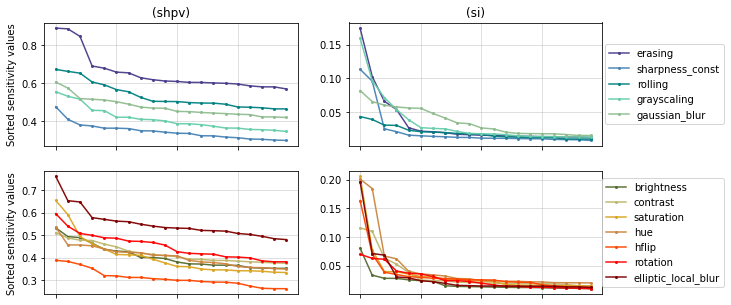

In [17]:
prediction.single_class.plot_top_sensitivity_values_decay(
    vgg11_loaded_sensitivity_values_dict_list,
    vgg11_classifying_layer_name,
    sensitivity_values_name_list,
    augmentation_set_numbers_list,
    n_top_values=n_top_values_decay_plot,
    figsize=figsize_decay_plot,
    extract_auxilliary_names=False,
    plot_colors=prediction.single_class._custom_colors[::-1],
    show=True,
)

### 2.3 Top sensitivity values and corresponding classes

[[$\leftarrow$Prev.subsect.]](#2.2-Decay-of-the-top-sensitivity-values)$\quad$[[Back to section]](#2.-VGG11)$\quad$[[Next subsect.$\to$]](#2.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)

In [18]:
vgg11_table_dict = prediction.single_class.extract_tables_top_sensitivity_values_decay(
    vgg11_loaded_sensitivity_values_dict_list,
    vgg11_classifying_layer_name,
    sensitivity_values_name_list,
    augmentation_set_numbers_list,
    ilsvrc_dataset.ind2class,
    n_top_values=10,
    extract_auxilliary_names=False,
)

In [19]:
for aug_name in augmentation_names:
    print(f'\n\t\t\t Augmentation: {aug_name}')
    display(vgg11_table_dict[aug_name])


			 Augmentation: erasing


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      211                          vizsla, Hungarian pointer   .89      343   
1       79                                          centipede   .88       31   
2      452                                bonnet, poke bonnet   .84      983   
3      853                              thatch, thatched roof   .69      771   
4      236                        Doberman, Doberman pinscher   .68      120   
5      909                                                wok   .66      444   
6      217         English springer, English springer spaniel   .65       66   
7      747  punching bag, punch bag, punching ball, punchball   .63      664   
8      620                            laptop, laptop computer   .62      247   
9      658                                             mitten   .61      912   

                                                            
                                          class_name value  
0                                            warthog   .17  
1                               tree frog, tree-frog   .10  
2                                        scuba diver   .07  
3                                               safe   .05  
4                                       fiddler crab   .03  
5      bicycle-built-for-two, tandem bicycle, tandem   .02  
6  horned viper, cerastes, sand viper, horned asp...   .02  
7                                            monitor   .02  
8                          Saint Bernard, St Bernard   .02  
9  worm fence, snake fence, snake-rail fence, Vir...   .02


			 Augmentation: sharpness_const


shpv                                                             si  \
  class_id                                      class_name value class_id   
0      348                                        ram, tup   .48      343   
1      259                                      Pomeranian   .41      391   
2      887                                        vestment   .38      618   
3      614                                          kimono   .38      249   
4      873                                  triumphal arch   .36      478   
5       40  American chameleon, anole, Anolis carolinensis   .36      348   
6      502                       clog, geta, patten, sabot   .36      516   
7      273          dingo, warrigal, warragal, Canis dingo   .35      504   
8      852                                     tennis ball   .35      654   
9      761                          remote control, remote   .34      859   

                                                            
                                          class_name value  
0                                            warthog   .11  
1  coho, cohoe, coho salmon, blue jack, silver sa...   .10  
2                                              ladle   .03  
3               malamute, malemute, Alaskan malamute   .02  
4                                             carton   .02  
5                                           ram, tup   .02  
6                                             cradle   .01  
7                                         coffee mug   .01  
8                                            minibus   .01  
9                                            toaster   .01


			 Augmentation: rolling


shpv                                                        si  \
  class_id                                 class_name value class_id   
0      199  Scotch terrier, Scottish terrier, Scottie   .67       80   
1      193                         Australian terrier   .66      812   
2      593   harmonica, mouth organ, harp, mouth harp   .65      612   
3      491                        chain saw, chainsaw   .61      582   
4      389                          barracouta, snoek   .59      500   
5      377                                   marmoset   .57      652   
6      733                                       pole   .55      504   
7      371   patas, hussar monkey, Erythrocebus patas   .53      876   
8      304                   leaf beetle, chrysomelid   .51      983   
9      628                         liner, ocean liner   .50      579   

                                                      
                                    class_name value  
0                                 black grouse   .04  
1                                space shuttle   .04  
2                jinrikisha, ricksha, rickshaw   .03  
3  grocery store, grocery, food market, market   .03  
4                               cliff dwelling   .02  
5                             military uniform   .02  
6                                   coffee mug   .02  
7                                     tub, vat   .02  
8                                  scuba diver   .02  
9                           grand piano, grand   .02


			 Augmentation: grayscaling


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      392                  rock beauty, Holocanthus tricolor   .56      343   
1      122  American lobster, Northern lobster, Maine lobs...   .53       31   
2      226                                             briard   .52      983   
3       49  African crocodile, Nile crocodile, Crocodylus ...   .46      812   
4       25    European fire salamander, Salamandra salamandra   .46      169   
5      619                              lampshade, lamp shade   .42      120   
6      194             Dandie Dinmont, Dandie Dinmont terrier   .42      600   
7      973                                         coral reef   .41      193   
8      645                                            maypole   .41      405   
9      125                                        hermit crab   .40      470   

                                    
                  class_name value  
0                    warthog   .16  
1       tree frog, tree-frog   .10  
2                scuba diver   .07  
3              space shuttle   .05  
4  borzoi, Russian wolfhound   .04  
5               fiddler crab   .03  
6                 hook, claw   .03  
7         Australian terrier   .03  
8         airship, dirigible   .02  
9   candle, taper, wax light   .02


			 Augmentation: gaussian_blur


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      709                            pencil box, pencil case   .61      205   
1      390                                                eel   .57      983   
2      595                                  harvester, reaper   .52      827   
3      824                                              stole   .52      971   
4      388  giant panda, panda, panda bear, coon bear, Ail...   .51      391   
5      455                                          bottlecap   .50      343   
6      110                            flatworm, platyhelminth   .49      299   
7      397            puffer, pufferfish, blowfish, globefish   .48      772   
8       58                                        water snake   .47      812   
9      334                                porcupine, hedgehog   .47       74   

                                                            
                                          class_name value  
0                              flat-coated retriever   .08  
1                                        scuba diver   .07  
2                                              stove   .06  
3                                             bubble   .06  
4  coho, cohoe, coho salmon, blue jack, silver sa...   .06  
5                                            warthog   .06  
6                                   meerkat, mierkat   .05  
7                                         safety pin   .04  
8                                      space shuttle   .03  
9                    garden spider, Aranea diademata   .03


			 Augmentation: brightness


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      379                              howler monkey, howler   .53      181   
1      923                                              plate   .49      723   
2      912  worm fence, snake fence, snake-rail fence, Vir...   .49      178   
3      242                                              boxer   .46      269   
4      495                        china cabinet, china closet   .44      427   
5       54              hognose snake, puff adder, sand viper   .43      165   
6      939                                zucchini, courgette   .43      237   
7      758                                               reel   .40      452   
8       51                                        triceratops   .40      626   
9      241                                        EntleBucher   .40      432   

                                                         
                                       class_name value  
0                              Bedlington terrier   .08  
1                                        pinwheel   .03  
2                                      Weimaraner   .03  
3  timber wolf, grey wolf, gray wolf, Canis lupus   .03  
4                                    barrel, cask   .03  
5                         black-and-tan coonhound   .02  
6                              miniature pinscher   .02  
7                             bonnet, poke bonnet   .01  
8                lighter, light, igniter, ignitor   .01  
9                                         bassoon   .01


			 Augmentation: contrast


shpv                                        si  \
  class_id                 class_name value class_id   
0      887                   vestment   .51      500   
1      704              parking meter   .49      611   
2      611              jigsaw puzzle   .48      513   
3      993                  gyromitra   .48      792   
4      891                waffle iron   .46      289   
5      579         grand piano, grand   .45      802   
6      402            acoustic guitar   .43      716   
7      651  microwave, microwave oven   .42      404   
8      969                     eggnog   .41      489   
9      952                        fig   .41      527   

                                              
                            class_name value  
0                       cliff dwelling   .12  
1                        jigsaw puzzle   .11  
2         cornet, horn, trumpet, trump   .06  
3                               shovel   .05  
4  snow leopard, ounce, Panthera uncia   .04  
5                           snowmobile   .02  
6                 picket fence, paling   .02  
7                             airliner   .02  
8                      chainlink fence   .02  
9                     desktop computer   .02


			 Augmentation: saturation


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      782                                 screen, CRT screen   .65      500   
1      106                                             wombat   .59      894   
2      764                                              rifle   .49      328   
3      898                                       water bottle   .46      422   
4      364         three-toed sloth, ai, Bradypus tridactylus   .44      269   
5      423                                       barber chair   .41      577   
6      589  hand blower, blow dryer, blow drier, hair drye...   .41      574   
7      931                                      bagel, beigel   .41      138   
8      314                                   cockroach, roach   .39      178   
9      463                                       bucket, pail   .38      513   

                                                         
                                       class_name value  
0                                  cliff dwelling   .21  
1                         wardrobe, closet, press   .08  
2                                      sea urchin   .04  
3                                         barbell   .04  
4  timber wolf, grey wolf, gray wolf, Canis lupus   .04  
5                                   gong, tam-tam   .03  
6                                       golf ball   .03  
7                                         bustard   .03  
8                                      Weimaraner   .03  
9                    cornet, horn, trumpet, trump   .02


			 Augmentation: hue


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      909                                                wok   .54      500   
1      189                                   Lakeland terrier   .46       12   
2      335  fox squirrel, eastern fox squirrel, Sciurus niger   .46       25   
3      609                                    jeep, landrover   .45      461   
4      365       orangutan, orang, orangutang, Pongo pygmaeus   .44      657   
5      274                                dhole, Cuon alpinus   .43      178   
6       79                                          centipede   .42      404   
7      167                                   English foxhound   .42      984   
8      618                                              ladle   .41      957   
9      202                        soft-coated wheaten terrier   .41      254   

                                                          
                                        class_name value  
0                                   cliff dwelling   .20  
1        house finch, linnet, Carpodacus mexicanus   .18  
2  European fire salamander, Salamandra salamandra   .07  
3                         breastplate, aegis, egis   .06  
4                                          missile   .04  
5                                       Weimaraner   .04  
6                                         airliner   .03  
7                                         rapeseed   .03  
8                                      pomegranate   .03  
9                                     pug, pug-dog   .03


			 Augmentation: hflip


shpv                                                      si  \
  class_id                               class_name value class_id   
0      617                lab coat, laboratory coat   .39      500   
1      293        cheetah, chetah, Acinonyx jubatus   .38      787   
2      243                             bull mastiff   .37      250   
3      541              drum, membranophone, tympan   .35      802   
4      503                          cocktail shaker   .32      657   
5      341  hog, pig, grunter, squealer, Sus scrofa   .32      654   
6      118          Dungeness crab, Cancer magister   .31      192   
7      787                          shield, buckler   .31      559   
8      124   crayfish, crawfish, crawdad, crawdaddy   .31      744   
9      426                                barometer   .30      248   

                               
             class_name value  
0        cliff dwelling   .16  
1       shield, buckler   .07  
2        Siberian husky   .04  
3            snowmobile   .03  
4               missile   .03  
5               minibus   .03  
6  cairn, cairn terrier   .03  
7         folding chair   .03  
8   projectile, missile   .03  
9     Eskimo dog, husky   .03


			 Augmentation: rotation


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      103  platypus, duckbill, duckbilled platypus, duck-...   .59      248   
1      464                                             buckle   .54       82   
2      551                                        face powder   .51       30   
3      694                          paddlewheel, paddle wheel   .50      438   
4      435                    bathtub, bathing tub, bath, tub   .49      250   
5      876                                           tub, vat   .49      269   
6      541                        drum, membranophone, tympan   .47      257   
7      759                                      reflex camera   .47      802   
8      375                            colobus, colobus monkey   .47      446   
9      712                                         Petri dish   .46      517   

                                                         
                                       class_name value  
0                               Eskimo dog, husky   .07  
1       ruffed grouse, partridge, Bonasa umbellus   .06  
2                      bullfrog, Rana catesbeiana   .06  
3                                          beaker   .04  
4                                  Siberian husky   .04  
5  timber wolf, grey wolf, gray wolf, Canis lupus   .04  
6                                  Great Pyrenees   .03  
7                                      snowmobile   .02  
8                             binder, ring-binder   .02  
9                                           crane   .02


			 Augmentation: elliptic_local_blur


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      777                                           scabbard   .76      500   
1      534       dishwasher, dish washer, dishwashing machine   .65      427   
2      673                              mouse, computer mouse   .65      704   
3      913                                              wreck   .58      272   
4      668                                             mosque   .57      513   
5      647                                      measuring cup   .56      557   
6      387  lesser panda, red panda, panda, bear cat, cat ...   .56      903   
7      165                            black-and-tan coonhound   .55      188   
8      157                                           papillon   .54      802   
9      454                     bookshop, bookstore, bookstall   .53       91   

                                                          
                                        class_name value  
0                                   cliff dwelling   .20  
1                                     barrel, cask   .07  
2                                    parking meter   .07  
3  coyote, prairie wolf, brush wolf, Canis latrans   .03  
4                     cornet, horn, trumpet, trump   .03  
5                              flagpole, flagstaff   .02  
6                                              wig   .02  
7                          wire-haired fox terrier   .02  
8                                       snowmobile   .02  
9                                           coucal   .02

### 2.4 Jaccard indices for top-5 predictions and top-5 sensitive classes

[[$\leftarrow$Prev.subsect.]](#2.3-Top-sensitivity-values-and-corresponding-classes)$\quad$[[Back to section]](#2.-VGG11)$\quad$[[Next subsect.$\to$]](#2.5-Jaccard-indices-for-top-5-masked-predictions-and-top-5-sensitive-classes)

In [20]:
vgg11_sensitivity_topn_list = prediction.single_class.get_sensitivity_topn_dict(
    vgg11_loaded_sensitivity_values_dict_list,
    vgg11_classifying_layer_name,
    augmentation_set_numbers_list,
    top_n=5,
    extract_auxilliary_names=False,
)

vgg11_results_jacc_nofcl_list = []
vgg11_results_jacc_aug_no_mask_list = []
vgg11_results_jacc_orig_no_mask_list = []

for i in range(n_sens_vals):
    (
        vgg11_results_jacc,
        vgg11_results_jacc_aug_no_mask,
        vgg11_results_jacc_orig_no_mask,
    ) = prediction.single_class.extract_jaccard(
        prediction_results_path_nofcl_list[i],
        vgg11_sensitivity_topn_list[i],
        augmentation_names,
        no_aug_key=no_aug_key,
        y_true_key=y_true_key,
    )
    vgg11_results_jacc_nofcl_list.append(vgg11_results_jacc)
    vgg11_results_jacc_aug_no_mask_list.append(vgg11_results_jacc_aug_no_mask)
    vgg11_results_jacc_orig_no_mask_list.append(vgg11_results_jacc_orig_no_mask)

Nsamples=50000
Nsamples=50000


In [21]:
for i_val, val_name in enumerate(sensitivity_values_name_list):
    table_jac_no_masking = prediction.single_class.extract_table_no_masking(
        vgg11_results_jacc_aug_no_mask_list[i_val],
        vgg11_results_jacc_orig_no_mask_list[i_val],
        augmentation_set_numbers_list,
        extract_auxilliary_names=False,
        n_round_digits=n_round_digits,
        no_aug_key=no_aug_key,
    )
    print(f'\n\n\t\t\t\t{val_name}')
    display(table_jac_no_masking)



				shpv


SA variable used for extracting the most sensitive classes from the classifying layer  \
                                                                                                    erasing   
Augmentation of input                                                                                         
original                                                          0.0024                                      
erasing                                                           0.0022                                      
sharpness_const                                                   0.0024                                      
rolling                                                           0.0024                                      
grayscaling                                                       0.0023                                      
gaussian_blur                                                     0.0023                                      
brightness                                                        0.0025                                      
contrast                                                          0.0026                                      
saturation                                                        0.0026                                      
hue                                                               0.0020                                      
hflip                                                             0.0025                                      
rotation                                                          0.0029                                      
elliptic_local_blur                                               0.0024                                      

                                                                         \
                      sharpness_const rolling grayscaling gaussian_blur   
Augmentation of input                                                     
original                       0.0026  0.0026      0.0021        0.0031   
erasing                        0.0030  0.0021      0.0018        0.0029   
sharpness_const                0.0026  0.0026      0.0022        0.0030   
rolling                        0.0030  0.0025      0.0021        0.0028   
grayscaling                    0.0025  0.0026      0.0016        0.0021   
gaussian_blur                  0.0020  0.0027      0.0025        0.0026   
brightness                     0.0028  0.0026      0.0022        0.0032   
contrast                       0.0028  0.0026      0.0021        0.0032   
saturation                     0.0028  0.0026      0.0025        0.0034   
hue                            0.0028  0.0022      0.0014        0.0052   
hflip                          0.0026  0.0026      0.0021        0.0031   
rotation                       0.0029  0.0029      0.0024        0.0036   
elliptic_local_blur            0.0025  0.0024      0.0020        0.0030   

                                                                               \
                      brightness contrast saturation     hue   hflip rotation   
Augmentation of input                                                           
original                  0.0033   0.0019     0.0027  0.0031  0.0025   0.0023   
erasing                   0.0031   0.0020     0.0036  0.0029  0.0023   0.0027   
sharpness_const           0.0033   0.0020     0.0028  0.0031  0.0026   0.0023   
rolling                   0.0034   0.0020     0.0029  0.0030  0.0025   0.0023   
grayscaling               0.0027   0.0020     0.0033  0.0034  0.0027   0.0029   
gaussian_blur             0.0041   0.0022     0.0028  0.0029  0.0027   0.0026   
brightness                0.0034   0.0022     0.0027  0.0030  0.0025   0.0022   
contrast                  0.0033   0.0018     0.0025  0.0028  0.0026   0.0022   
saturation                0.0033   0.0020     0.0027  0.0030  0.0024   0.0022   
hue                       0.0022   0.0018     0.0034  0.0020  0.0020   0



				si


SA variable used for extracting the most sensitive classes from the classifying layer  \
                                                                                                    erasing   
Augmentation of input                                                                                         
original                                                          0.0030                                      
erasing                                                           0.0023                                      
sharpness_const                                                   0.0030                                      
rolling                                                           0.0026                                      
grayscaling                                                       0.0023                                      
gaussian_blur                                                     0.0025                                      
brightness                                                        0.0027                                      
contrast                                                          0.0028                                      
saturation                                                        0.0028                                      
hue                                                               0.0031                                      
hflip                                                             0.0030                                      
rotation                                                          0.0025                                      
elliptic_local_blur                                               0.0029                                      

                                                                         \
                      sharpness_const rolling grayscaling gaussian_blur   
Augmentation of input                                                     
original                       0.0036  0.0025      0.0031        0.0025   
erasing                        0.0032  0.0025      0.0027        0.0025   
sharpness_const                0.0037  0.0025      0.0031        0.0026   
rolling                        0.0037  0.0028      0.0029        0.0024   
grayscaling                    0.0043  0.0027      0.0024        0.0032   
gaussian_blur                  0.0024  0.0037      0.0028        0.0020   
brightness                     0.0033  0.0025      0.0029        0.0029   
contrast                       0.0031  0.0026      0.0031        0.0036   
saturation                     0.0032  0.0025      0.0029        0.0027   
hue                            0.0030  0.0021      0.0034        0.0045   
hflip                          0.0037  0.0025      0.0031        0.0025   
rotation                       0.0029  0.0032      0.0031        0.0022   
elliptic_local_blur            0.0036  0.0025      0.0030        0.0026   

                                                                               \
                      brightness contrast saturation     hue   hflip rotation   
Augmentation of input                                                           
original                  0.0022   0.0022     0.0063  0.0022  0.0028   0.0030   
erasing                   0.0024   0.0027     0.0046  0.0023  0.0026   0.0030   
sharpness_const           0.0023   0.0023     0.0063  0.0021  0.0027   0.0030   
rolling                   0.0026   0.0025     0.0054  0.0023  0.0028   0.0031   
grayscaling               0.0035   0.0031     0.0045  0.0020  0.0027   0.0036   
gaussian_blur             0.0026   0.0017     0.0038  0.0021  0.0024   0.0033   
brightness                0.0027   0.0028     0.0054  0.0023  0.0028   0.0030   
contrast                  0.0026   0.0026     0.0050  0.0021  0.0026   0.0029   
saturation                0.0028   0.0023     0.0052  0.0021  0.0024   0.0029   
hue                       0.0046   0.0023     0.0042  0.0018  0.0026   0

### 2.5 Jaccard indices for top-5 masked predictions and top-5 sensitive classes

[[$\leftarrow$Prev.subsect.]](#2.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)$\quad$[[Back to section]](#2.-VGG11)$\quad$


In [22]:
for i_val, val_name in enumerate(sensitivity_values_name_list):    
    (
        featured_measurements,
        featured_measurements_nai
    ) = prediction.single_class.collect_featured_measurements_jac(
        vgg11_results_jacc_nofcl_list[i_val],
        augmentation_set_numbers_list,
        alphas,
        percentiles,
        inverts,
        no_aug_key=no_aug_key,
    )
    table = prediction.single_class.extract_table_self_masking(
        featured_measurements,
        augmentation_set_numbers_list,
        alphas,
        percentiles,
        inverts,
        n_round_digits=n_round_digits,
        extract_auxilliary_names=False,
    )
    print(f'\n\n\t\t\t\t{val_name}')
    display(table)



				shpv


Mask configuration (SA variable is the same as augmentation)  \
                                                                         alpha=0.0   
                                                                             q=0.5   
Augmentation of input                                                                
erasing                                                           0.0022             
sharpness_const                                                   0.0000             
rolling                                                           0.0000             
grayscaling                                                       0.0000             
gaussian_blur                                                     0.0000             
brightness                                                        0.0000             
contrast                                                          0.0392             
saturation                                                        0.0002             
hue                                                               0.0041             
hflip                                                             0.0000             
rotation                                                          0.0009             
elliptic_local_blur                                               0.0000             

                                                                         \
                                                      alpha=0.5           
                        q=0.6   q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   
Augmentation of input                                                     
erasing                0.0030  0.0037  0.0036  0.0038    0.0028  0.0033   
sharpness_const        0.0001  0.0005  0.0014  0.0028    0.0013  0.0026   
rolling                0.0000  0.0001  0.0013  0.0026    0.0016  0.0021   
grayscaling            0.0000  0.0001  0.0003  0.0007    0.0008  0.0008   
gaussian_blur          0.0001  0.0010  0.0021  0.0025    0.0015  0.0017   
brightness             0.0001  0.0007  0.0020  0.0030    0.0020  0.0025   
contrast               0.0231  0.0096  0.0051  0.0035    0.0041  0.0034   
saturation             0.0003  0.0015  0.0021  0.0023    0.0024  0.0024   
hue                    0.0050  0.0043  0.0035  0.0031    0.0027  0.0028   
hflip                  0.0000  0.0001  0.0008  0.0022    0.0013  0.0016   
rotation               0.0011  0.0015  0.0023  0.0020    0.0036  0.0030   
elliptic_local_blur    0.0000  0.0015  0.0025  0.0029    0.0036  0.0035   

                                                                         \
                                              alpha=1.5                   
                        q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   q=0.7   
Augmentation of input                                                     
erasing                0.0035  0.0036  0.0032    0.0011  0.0010  0.0009   
sharpness_const        0.0027  0.0028  0.0027    0.0012  0.0022  0.0024   
rolling                0.0024  0.0025  0.0026    0.0018  0.0019  0.0020   
grayscaling            0.0009  0.0010  0.0012    0.0015  0.0018  0.0018   
gaussian_blur          0.0020  0.0023  0.0026    0.0027  0.0029  0.0030   
brightness             0.0029  0.0032  0.0034    0.0032  0.0037  0.0043   
contrast               0.0028  0.0026  0.0024    0.0015  0.0017  0.0019   
saturation             0.0025  0.0025  0.0025    0.0027  0.0030  0.0031   
hue                    0.0029  0.0027  0.0025    0.0019  0.0017  0.0015   
hflip                  0.0021  0.0023  0.0025    0.0024  0.0027  0.0027   
rotation               0.0024  0.0021  0.0020    0.0020  0.0019  0.0018   
elliptic_local_blur    0.0029  0.0030  0.0029    0.0015  0.0021  0.0024   

                                                       
                                        inv=0   inv=1  
                        q=0.8   q=0.9                  
Augmentation of input                                  
erasing            



				si


Mask configuration (SA variable is the same as augmentation)  \
                                                                         alpha=0.0   
                                                                             q=0.5   
Augmentation of input                                                                
erasing                                                           0.0023             
sharpness_const                                                   0.0000             
rolling                                                           0.0062             
grayscaling                                                       0.0058             
gaussian_blur                                                     0.0010             
brightness                                                        0.0080             
contrast                                                          0.0106             
saturation                                                        0.0613             
hue                                                               0.0222             
hflip                                                             0.1111             
rotation                                                          0.0017             
elliptic_local_blur                                               0.0230             

                                                                         \
                                                      alpha=0.5           
                        q=0.6   q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   
Augmentation of input                                                     
erasing                0.0020  0.0024  0.0029  0.0023    0.0028  0.0027   
sharpness_const        0.0120  0.0078  0.0040  0.0037    0.0090  0.0037   
rolling                0.0034  0.0026  0.0026  0.0034    0.0040  0.0035   
grayscaling            0.0022  0.0017  0.0017  0.0021    0.0023  0.0021   
gaussian_blur          0.0033  0.0022  0.0018  0.0019    0.0015  0.0016   
brightness             0.0058  0.0047  0.0039  0.0036    0.0039  0.0038   
contrast               0.0046  0.0026  0.0024  0.0024    0.0026  0.0023   
saturation             0.0128  0.0046  0.0035  0.0034    0.0038  0.0033   
hue                    0.0068  0.0040  0.0031  0.0032    0.0040  0.0033   
hflip                  0.0206  0.0123  0.0064  0.0039    0.0059  0.0042   
rotation               0.0022  0.0032  0.0035  0.0034    0.0035  0.0034   
elliptic_local_blur    0.0121  0.0055  0.0031  0.0028    0.0035  0.0030   

                                                                         \
                                              alpha=1.5                   
                        q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   q=0.7   
Augmentation of input                                                     
erasing                0.0027  0.0025  0.0023    0.0018  0.0012  0.0007   
sharpness_const        0.0036  0.0036  0.0037    0.0048  0.0043  0.0042   
rolling                0.0033  0.0032  0.0031    0.0023  0.0026  0.0026   
grayscaling            0.0020  0.0020  0.0023    0.0033  0.0032  0.0033   
gaussian_blur          0.0015  0.0016  0.0018    0.0022  0.0024  0.0029   
brightness             0.0036  0.0035  0.0035    0.0021  0.0020  0.0019   
contrast               0.0023  0.0023  0.0024    0.0033  0.0035  0.0035   
saturation             0.0032  0.0033  0.0039    0.0126  0.0098  0.0075   
hue                    0.0030  0.0028  0.0026    0.0009  0.0009  0.0008   
hflip                  0.0038  0.0033  0.0030    0.0018  0.0023  0.0024   
rotation               0.0033  0.0033  0.0032    0.0027  0.0029  0.0030   
elliptic_local_blur    0.0027  0.0026  0.0026    0.0019  0.0020  0.0021   

                                                       
                                        inv=0   inv=1  
                        q=0.8   q=0.9                  
Augmentation of input                                  
erasing            

## 3. ResNet18

[[$\leftarrow$ Prev.part]](#2.-VGG11) $\qquad$ [[Back to top]](#Navigation) $\qquad$

- [3.1 Set up variables](#3.1-Set-up-variables)
- [3.2 Decay of the top sensitivity values](#3.2-Decay-of-the-top-sensitivity-values)
- [3.3 Top sensitivity values and corresponding classes](#3.3-Top-sensitivity-values-and-corresponding-classes)
- [3.4 Jaccard indices for top-5 predictions and top-5 sensitive classes](#3.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)
- [3.5 Jaccard indices for top-5 masked predictions and top-5 sensitive classes](#3.5-Jaccard-indices-for-top-5-masked-predictions-and-top-5-sensitive-classes)

### 3.1 Set up variables

$\quad$[[Back to section]](#3.-ResNet18)$\quad$[[Next subsect.$\to$]](#3.2-Decay-of-the-top-sensitivity-values)

In [23]:
resnet18_network_name = 'resnet18'
resnet18_classifying_layer_name = 'fc'

prediction_results_path_nofcl_list = [
    os.path.join(
        results_dirname, f'{val_name}_{resnet18_network_name}_{values_fnm_base}_pred_NOFCL_part=valid.hdf5'
    ) for val_name in sensitivity_values_name_list
]

resnet18_values_fnms_dict = preparation.single_unit.extract_massive_values_fnms(
    resnet18_network_name,
    values_fnm_base,
    augmentation_set_numbers_list,
    prefix=None
);

resnet18_loaded_sensitivity_values_dict_list = []
for sensitivity_values_name in sensitivity_values_name_list:
    loaded_sensitivity_values_dict = prediction.compute.get_all_values(
        resnet18_values_fnms_dict,
        results_dirname,
        [resnet18_classifying_layer_name],
        sensitivity_values_name,
        augmentation_set_numbers_list,
        shpv_group_indices_dict,
        extract_auxilliary_names=False,
    )
    resnet18_loaded_sensitivity_values_dict_list.append(
        loaded_sensitivity_values_dict
    )

### 3.2 Decay of the top sensitivity values

[[$\leftarrow$Prev.subsect.]](#3.1-Set-up-variables)$\quad$[[Back to section]](#3.-ResNet18)$\quad$[[Next subsect.$\to$]](#3.3-Top-sensitivity-values-and-corresponding-classes)

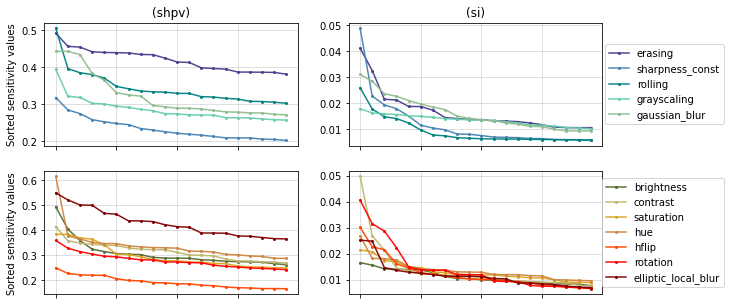

In [24]:
prediction.single_class.plot_top_sensitivity_values_decay(
    resnet18_loaded_sensitivity_values_dict_list,
    resnet18_classifying_layer_name,
    sensitivity_values_name_list,
    augmentation_set_numbers_list,
    n_top_values=n_top_values_decay_plot,
    figsize=figsize_decay_plot,
    extract_auxilliary_names=False,
    plot_colors=prediction.single_class._custom_colors[::-1],
    show=True,
)

### 3.3 Top sensitivity values and corresponding classes

[[$\leftarrow$Prev.subsect.]](#3.2-Decay-of-the-top-sensitivity-values)$\quad$[[Back to section]](#3.-ResNet18)$\quad$[[Next subsect.$\to$]](#3.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)

In [25]:
resnet18_table_dict = prediction.single_class.extract_tables_top_sensitivity_values_decay(
    resnet18_loaded_sensitivity_values_dict_list,
    resnet18_classifying_layer_name,
    sensitivity_values_name_list,
    augmentation_set_numbers_list,
    ilsvrc_dataset.ind2class,
    n_top_values=10,
    extract_auxilliary_names=False,
)

In [26]:
for aug_name in augmentation_names:
    print(f'\n\t\t\t Augmentation: {aug_name}')
    display(resnet18_table_dict[aug_name])


			 Augmentation: erasing


shpv                                                       si  \
  class_id                                class_name value class_id   
0      438                                    beaker   .49      894   
1      371  patas, hussar monkey, Erythrocebus patas   .46       43   
2      433                 bathing cap, swimming cap   .45      851   
3      796                                  ski mask   .44      664   
4      540           drilling platform, offshore rig   .44      782   
5      255                                  Leonberg   .44      711   
6      692                                    packet   .44      371   
7      626          lighter, light, igniter, ignitor   .43      625   
8      266                          miniature poodle   .43      514   
9       29   axolotl, mud puppy, Ambystoma mexicanum   .42      695   

                                                   
                                 class_name value  
0                   wardrobe, closet, press   .04  
1      frilled lizard, Chlamydosaurus kingi   .03  
2             television, television system   .02  
3                                   monitor   .02  
4                        screen, CRT screen   .02  
5                          perfume, essence   .02  
6  patas, hussar monkey, Erythrocebus patas   .02  
7                                  lifeboat   .01  
8                               cowboy boot   .01  
9                                   padlock   .01


			 Augmentation: sharpness_const


shpv                                               si  \
  class_id                        class_name value class_id   
0      735                            poncho   .32      894   
1      595                 harvester, reaper   .28      689   
2      906                       Windsor tie   .27      437   
3      551                       face powder   .26      955   
4      311               grasshopper, hopper   .25      176   
5      838  sunscreen, sunblock, sun blocker   .25      468   
6      644                        matchstick   .25      217   
7      901                       whiskey jug   .23      281   
8       58                       water snake   .23      532   
9      631                            lotion   .23       16   

                                                     
                                   class_name value  
0                     wardrobe, closet, press   .05  
1                                   overskirt   .02  
2    beacon, lighthouse, beacon light, pharos   .02  
3                        jackfruit, jak, jack   .02  
4                       Saluki, gazelle hound   .01  
5                    cab, hack, taxi, taxicab   .01  
6  English springer, English springer spaniel   .01  
7                            tabby, tabby cat   .01  
8                         dining table, board   .01  
9                                      bulbul   .01


			 Augmentation: rolling


shpv                                                         si  \
  class_id                                  class_name value class_id   
0      960            chocolate sauce, chocolate syrup   .50      217   
1      217  English springer, English springer spaniel   .40      205   
2      678                                  neck brace   .38      861   
3      119                 rock crab, Cancer irroratus   .38      949   
4       69                                   trilobite   .37      210   
5      935                               mashed potato   .35      625   
6      977                           sandbar, sand bar   .34      810   
7      701                            parachute, chute   .34       60   
8      537               dogsled, dog sled, dog sleigh   .33      916   
9      737                     pop bottle, soda bottle   .33      674   

                                                     
                                   class_name value  
0  English springer, English springer spaniel   .03  
1                       flat-coated retriever   .02  
2                                 toilet seat   .01  
3                                  strawberry   .01  
4                 German short-haired pointer   .01  
5                                    lifeboat   .01  
6                                   space bar   .01  
7            night snake, Hypsiglena torquata   .01  
8      web site, website, internet site, site   .01  
9                                   mousetrap   .01


			 Augmentation: grayscaling


shpv                                           si  \
  class_id                    class_name value class_id   
0      973                    coral reef   .39       31   
1      903                           wig   .32      841   
2      213      Irish setter, red setter   .32      625   
3      975           lakeside, lakeshore   .30      488   
4      529         diaper, nappy, napkin   .30      230   
5      539          doormat, welcome mat   .29      879   
6      173  Ibizan hound, Ibizan Podenco   .29      217   
7      317                    leafhopper   .29      851   
8       16                        bulbul   .28      205   
9      652              military uniform   .27      437   

                                                          
                                        class_name value  
0                             tree frog, tree-frog   .02  
1                                       sweatshirt   .02  
2                                         lifeboat   .02  
3                                            chain   .02  
4  Shetland sheepdog, Shetland sheep dog, Shetland   .02  
5                                         umbrella   .01  
6       English springer, English springer spaniel   .01  
7                    television, television system   .01  
8                            flat-coated retriever   .01  
9         beacon, lighthouse, beacon light, pharos   .01


			 Augmentation: gaussian_blur


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      252         affenpinscher, monkey pinscher, monkey dog   .44      364   
1      887                                           vestment   .44      217   
2      462                                              broom   .43      331   
3       55                           green snake, grass snake   .38      797   
4      584                                         hair slide   .36      437   
5      301  ladybug, ladybeetle, lady beetle, ladybird, la...   .33      861   
6      313          walking stick, walkingstick, stick insect   .33      879   
7      819                                              stage   .32      970   
8      743                               prison, prison house   .30      371   
9      811                                       space heater   .29      205   

                                                     
                                   class_name value  
0  three-toed sloth, ai, Bradypus tridactylus   .03  
1  English springer, English springer spaniel   .03  
2                                        hare   .02  
3                                sleeping bag   .02  
4    beacon, lighthouse, beacon light, pharos   .02  
5                                 toilet seat   .02  
6                                    umbrella   .02  
7                                         alp   .02  
8    patas, hussar monkey, Erythrocebus patas   .01  
9                       flat-coated retriever   .01


			 Augmentation: brightness


shpv                                                             si  \
  class_id                                      class_name value class_id   
0      454                  bookshop, bookstore, bookstall   .49      881   
1      827                                           stove   .40      407   
2      972                           cliff, drop, drop-off   .36      487   
3      777                                        scabbard   .32       87   
4       56                           king snake, kingsnake   .31      344   
5      813                                         spatula   .31      126   
6      219  cocker spaniel, English cocker spaniel, cocker   .30      189   
7      722                                  ping-pong ball   .30      773   
8      128                      black stork, Ciconia nigra   .29      971   
9      449                                       boathouse   .29      829   

                                                            
                                          class_name value  
0                             upright, upright piano   .02  
1                                          ambulance   .02  
2  cellular telephone, cellular phone, cellphone,...   .01  
3    African grey, African gray, Psittacus erithacus   .01  
4  hippopotamus, hippo, river horse, Hippopotamus...   .01  
5                                             isopod   .01  
6                                   Lakeland terrier   .01  
7                            saltshaker, salt shaker   .01  
8                                             bubble   .01  
9     streetcar, tram, tramcar, trolley, trolley car   .01


			 Augmentation: contrast


shpv                                             si  \
  class_id                      class_name value class_id   
0      184                   Irish terrier   .41      611   
1      193              Australian terrier   .36      511   
2      542                       drumstick   .35      971   
3      908                            wing   .34      818   
4      597                         holster   .34      600   
5      768                      rugby ball   .34        6   
6      225                        malinois   .33      657   
7      618                           ladle   .32      596   
8      491             chain saw, chainsaw   .32      450   
9      757  recreational vehicle, RV, R.V.   .32      989   

                                  
                class_name value  
0            jigsaw puzzle   .05  
1              convertible   .03  
2                   bubble   .02  
3          spotlight, spot   .01  
4               hook, claw   .01  
5                 stingray   .01  
6                  missile   .01  
7                  hatchet   .01  
8  bobsled, bobsleigh, bob   .01  
9   hip, rose hip, rosehip   .01


			 Augmentation: saturation


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      680                                             nipple   .38      107   
1      961                                              dough   .38      578   
2      977                                  sandbar, sand bar   .37      971   
3      313          walking stick, walkingstick, stick insect   .36      881   
4      844         switch, electric switch, electrical switch   .34      394   
5        5         electric ray, crampfish, numbfish, torpedo   .30      180   
6      180  American Staffordshire terrier, Staffordshire ...   .30      634   
7      122  American lobster, Northern lobster, Maine lobs...   .29      685   
8       27                                                eft   .28      499   
9      299                                   meerkat, mierkat   .28      902   

                                                            
                                          class_name value  
0                                          jellyfish   .02  
1                                               gown   .02  
2                                             bubble   .02  
3                             upright, upright piano   .02  
4                                           sturgeon   .01  
5  American Staffordshire terrier, Staffordshire ...   .01  
6                                lumbermill, sawmill   .01  
7         odometer, hodometer, mileometer, milometer   .01  
8                     cleaver, meat cleaver, chopper   .01  
9                                            whistle   .01


			 Augmentation: hue


shpv                                          si  \
  class_id                   class_name value class_id   
0      493          chiffonier, commode   .62      309   
1      963             pizza, pizza pie   .38      324   
2      753                     radiator   .36      495   
3      202  soft-coated wheaten terrier   .35      530   
4      694    paddlewheel, paddle wheel   .35      107   
5      932                      pretzel   .35      112   
6      917                   comic book   .34      938   
7      949                   strawberry   .33      819   
8      787              shield, buckler   .33      870   
9      246                   Great Dane   .33      868   

                                      
                    class_name value  
0                          bee   .03  
1            cabbage butterfly   .02  
2  china cabinet, china closet   .02  
3                digital clock   .02  
4                    jellyfish   .01  
5                        conch   .01  
6                  cauliflower   .01  
7                        stage   .01  
8  tricycle, trike, velocipede   .01  
9                         tray   .01


			 Augmentation: hflip


shpv                                                         si  \
  class_id                                  class_name value class_id   
0      959                                   carbonara   .25      948   
1      397     puffer, pufferfish, blowfish, globefish   .23      680   
2      982                           groom, bridegroom   .22      568   
3      602                    horizontal bar, high bar   .22      507   
4      185                             Norfolk terrier   .22      394   
5      400  academic gown, academic robe, judge's robe   .21      685   
6      748                                       purse   .20      619   
7      548                        entertainment center   .20      472   
8      931                               bagel, beigel   .19      557   
9      843                                       swing   .19      443   

                                                     
                                   class_name value  
0                                Granny Smith   .03  
1                                      nipple   .02  
2                                    fur coat   .02  
3                            combination lock   .02  
4                                    sturgeon   .01  
5  odometer, hodometer, mileometer, milometer   .01  
6                       lampshade, lamp shade   .01  
7                                       canoe   .01  
8                         flagpole, flagstaff   .01  
9                                         bib   .01


			 Augmentation: rotation


shpv                                                                si  \
  class_id                                         class_name value class_id   
0      926                                    hot pot, hotpot   .36      868   
1      789                                              shoji   .33      487   
2      276                                      hyena, hyaena   .31      652   
3      356                                             weasel   .30      947   
4      398                                             abacus   .30      272   
5      897          washer, automatic washer, washing machine   .29      704   
6      499                     cleaver, meat cleaver, chopper   .29      131   
7      469                                  caldron, cauldron   .28      670   
8      921  book jacket, dust cover, dust jacket, dust wra...   .28      407   
9      418            ballpoint, ballpoint pen, ballpen, Biro   .27      513   

                                                            
                                          class_name value  
0                                               tray   .04  
1  cellular telephone, cellular phone, cellphone,...   .03  
2                                   military uniform   .03  
3                                           mushroom   .02  
4    coyote, prairie wolf, brush wolf, Canis latrans   .01  
5                                      parking meter   .01  
6                little blue heron, Egretta caerulea   .01  
7                             motor scooter, scooter   .01  
8                                          ambulance   .01  
9                       cornet, horn, trumpet, trump   .01


			 Augmentation: elliptic_local_blur


shpv                                                              si  \
  class_id                                       class_name value class_id   
0      933                                     cheeseburger   .55      411   
1      961                                            dough   .52      499   
2      209                         Chesapeake Bay retriever   .50      318   
3      901                                      whiskey jug   .50        6   
4      158                                      toy terrier   .47      685   
5      478                                           carton   .46      186   
6      880                              unicycle, monocycle   .44      875   
7       25  European fire salamander, Salamandra salamandra   .44      407   
8      503                                  cocktail shaker   .43      487   
9      831                            studio couch, day bed   .42      180   

                                                            
                                          class_name value  
0                                              apron   .03  
1                     cleaver, meat cleaver, chopper   .02  
2                             lacewing, lacewing fly   .01  
3                                           stingray   .01  
4         odometer, hodometer, mileometer, milometer   .01  
5                                    Norwich terrier   .01  
6                                           trombone   .01  
7                                          ambulance   .01  
8  cellular telephone, cellular phone, cellphone,...   .01  
9  American Staffordshire terrier, Staffordshire ...   .01

### 3.4 Jaccard indices for top-5 predictions and top-5 sensitive classes

[[$\leftarrow$Prev.subsect.]](#3.3-Top-sensitivity-values-and-corresponding-classes)$\quad$[[Back to section]](#3.-ResNet18)$\quad$[[Next subsect.$\to$]](#3.5-Jaccard-indices-for-top-5-masked-predictions-and-top-5-sensitive-classes)

In [ ]:
resnet18_sensitivity_topn_list = prediction.single_class.get_sensitivity_topn_dict(
    resnet18_loaded_sensitivity_values_dict_list,
    resnet18_classifying_layer_name,
    augmentation_set_numbers_list,
    top_n=5,
    extract_auxilliary_names=False,
)

resnet18_results_jacc_nofcl_list = []
resnet18_results_jacc_aug_no_mask_list = []
resnet18_results_jacc_orig_no_mask_list = []

for i in range(n_sens_vals):
    (
        resnet18_results_jacc,
        resnet18_results_jacc_aug_no_mask,
        resnet18_results_jacc_orig_no_mask,
    ) = prediction.single_class.extract_jaccard(
        prediction_results_path_nofcl_list[i],
        resnet18_sensitivity_topn_list[i],
        augmentation_names,
        no_aug_key=no_aug_key,
        y_true_key=y_true_key,
    )
    resnet18_results_jacc_nofcl_list.append(resnet18_results_jacc)
    resnet18_results_jacc_aug_no_mask_list.append(resnet18_results_jacc_aug_no_mask)
    resnet18_results_jacc_orig_no_mask_list.append(resnet18_results_jacc_orig_no_mask)

Nsamples=50000
Nsamples=50000


In [28]:
for i_val, val_name in enumerate(sensitivity_values_name_list):
    table_jac_no_masking = prediction.single_class.extract_table_no_masking(
        resnet18_results_jacc_aug_no_mask_list[i_val],
        resnet18_results_jacc_orig_no_mask_list[i_val],
        augmentation_set_numbers_list,
        extract_auxilliary_names=False,
        n_round_digits=n_round_digits,
        no_aug_key=no_aug_key,
    )
    print(f'\n\n\t\t\t\t{val_name}')
    display(table_jac_no_masking)



				shpv


SA variable used for extracting the most sensitive classes from the classifying layer  \
                                                                                                    erasing   
Augmentation of input                                                                                         
original                                                          0.0027                                      
erasing                                                           0.0022                                      
sharpness_const                                                   0.0026                                      
rolling                                                           0.0027                                      
grayscaling                                                       0.0025                                      
gaussian_blur                                                     0.0034                                      
brightness                                                        0.0026                                      
contrast                                                          0.0024                                      
saturation                                                        0.0028                                      
hue                                                               0.0028                                      
hflip                                                             0.0027                                      
rotation                                                          0.0031                                      
elliptic_local_blur                                               0.0028                                      

                                                                         \
                      sharpness_const rolling grayscaling gaussian_blur   
Augmentation of input                                                     
original                       0.0024  0.0024      0.0032        0.0024   
erasing                        0.0019  0.0021      0.0027        0.0021   
sharpness_const                0.0023  0.0024      0.0030        0.0022   
rolling                        0.0021  0.0023      0.0028        0.0023   
grayscaling                    0.0013  0.0021      0.0017        0.0014   
gaussian_blur                  0.0027  0.0026      0.0034        0.0028   
brightness                     0.0022  0.0024      0.0031        0.0024   
contrast                       0.0018  0.0026      0.0029        0.0021   
saturation                     0.0022  0.0022      0.0038        0.0024   
hue                            0.0028  0.0020      0.0042        0.0039   
hflip                          0.0024  0.0025      0.0031        0.0024   
rotation                       0.0026  0.0030      0.0035        0.0027   
elliptic_local_blur            0.0023  0.0024      0.0033        0.0023   

                                                                               \
                      brightness contrast saturation     hue   hflip rotation   
Augmentation of input                                                           
original                  0.0031   0.0031     0.0025  0.0020  0.0028   0.0026   
erasing                   0.0029   0.0027     0.0030  0.0020  0.0029   0.0025   
sharpness_const           0.0030   0.0031     0.0024  0.0021  0.0028   0.0024   
rolling                   0.0034   0.0030     0.0022  0.0021  0.0028   0.0025   
grayscaling               0.0025   0.0027     0.0028  0.0021  0.0025   0.0026   
gaussian_blur             0.0025   0.0026     0.0028  0.0018  0.0027   0.0035   
brightness                0.0030   0.0029     0.0022  0.0020  0.0028   0.0024   
contrast                  0.0030   0.0032     0.0020  0.0020  0.0029   0.0024   
saturation                0.0028   0.0032     0.0023  0.0020  0.0026   0.0025   
hue                       0.0026   0.0020     0.0020  0.0012  0.0018   0



				si


SA variable used for extracting the most sensitive classes from the classifying layer  \
                                                                                                    erasing   
Augmentation of input                                                                                         
original                                                          0.0038                                      
erasing                                                           0.0087                                      
sharpness_const                                                   0.0038                                      
rolling                                                           0.0041                                      
grayscaling                                                       0.0035                                      
gaussian_blur                                                     0.0037                                      
brightness                                                        0.0038                                      
contrast                                                          0.0043                                      
saturation                                                        0.0042                                      
hue                                                               0.0042                                      
hflip                                                             0.0038                                      
rotation                                                          0.0027                                      
elliptic_local_blur                                               0.0038                                      

                                                                         \
                      sharpness_const rolling grayscaling gaussian_blur   
Augmentation of input                                                     
original                       0.0023  0.0025      0.0026        0.0023   
erasing                        0.0027  0.0024      0.0022        0.0028   
sharpness_const                0.0022  0.0025      0.0026        0.0023   
rolling                        0.0024  0.0026      0.0023        0.0025   
grayscaling                    0.0019  0.0021      0.0026        0.0019   
gaussian_blur                  0.0024  0.0026      0.0026        0.0023   
brightness                     0.0021  0.0024      0.0026        0.0022   
contrast                       0.0020  0.0025      0.0031        0.0025   
saturation                     0.0022  0.0024      0.0029        0.0023   
hue                            0.0023  0.0028      0.0028        0.0032   
hflip                          0.0022  0.0026      0.0026        0.0023   
rotation                       0.0020  0.0024      0.0026        0.0024   
elliptic_local_blur            0.0023  0.0025      0.0026        0.0023   

                                                                               \
                      brightness contrast saturation     hue   hflip rotation   
Augmentation of input                                                           
original                  0.0027   0.0029     0.0025  0.0025  0.0028   0.0039   
erasing                   0.0032   0.0042     0.0027  0.0024  0.0024   0.0039   
sharpness_const           0.0028   0.0032     0.0025  0.0024  0.0025   0.0040   
rolling                   0.0027   0.0028     0.0024  0.0025  0.0026   0.0037   
grayscaling               0.0029   0.0042     0.0033  0.0019  0.0029   0.0043   
gaussian_blur             0.0025   0.0028     0.0024  0.0024  0.0034   0.0032   
brightness                0.0029   0.0042     0.0027  0.0026  0.0024   0.0038   
contrast                  0.0028   0.0057     0.0032  0.0027  0.0022   0.0035   
saturation                0.0028   0.0034     0.0028  0.0029  0.0025   0.0038   
hue                       0.0027   0.0043     0.0037  0.0045  0.0028   0

### 3.5 Jaccard indices for top-5 masked predictions and top-5 sensitive classes

[[$\leftarrow$Prev.subsect.]](#3.4-Jaccard-indices-for-top-5-predictions-and-top-5-sensitive-classes)$\quad$[[Back to section]](#3.-ResNet18)$\quad$

In [29]:
for i_val, val_name in enumerate(sensitivity_values_name_list):
    featured_measurements, _ = prediction.single_class.collect_featured_measurements_jac(
        resnet18_results_jacc_nofcl_list[i_val],
        augmentation_set_numbers_list,
        alphas,
        percentiles,
        inverts,
        no_aug_key=no_aug_key,
    )
    table = prediction.single_class.extract_table_self_masking(
        featured_measurements,
        augmentation_set_numbers_list,
        alphas,
        percentiles,
        inverts,
        n_round_digits=n_round_digits,
        extract_auxilliary_names=False,
    )
    print(f'\n\n\t\t\t\t{val_name}')
    display(table)



				shpv


Mask configuration (SA variable is the same as augmentation)  \
                                                                         alpha=0.0   
                                                                             q=0.5   
Augmentation of input                                                                
erasing                                                           0.0004             
sharpness_const                                                   0.0000             
rolling                                                           0.0000             
grayscaling                                                       0.0000             
gaussian_blur                                                     0.0000             
brightness                                                        0.0162             
contrast                                                          0.0000             
saturation                                                        0.0000             
hue                                                               0.0000             
hflip                                                             0.0000             
rotation                                                          0.0000             
elliptic_local_blur                                               0.0000             

                                                                         \
                                                      alpha=0.5           
                        q=0.6   q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   
Augmentation of input                                                     
erasing                0.0003  0.0002  0.0004  0.0013    0.0020  0.0020   
sharpness_const        0.0000  0.0000  0.0039  0.0034    0.0007  0.0002   
rolling                0.0002  0.0006  0.0013  0.0019    0.0002  0.0004   
grayscaling            0.0000  0.0002  0.0024  0.0035    0.0002  0.0007   
gaussian_blur          0.0000  0.0000  0.0002  0.0024    0.0008  0.0015   
brightness             0.0001  0.0001  0.0025  0.0039    0.0030  0.0027   
contrast               0.0000  0.0000  0.0002  0.0021    0.0002  0.0002   
saturation             0.0001  0.0001  0.0022  0.0028    0.0005  0.0009   
hue                    0.0000  0.0012  0.0016  0.0017    0.0005  0.0016   
hflip                  0.0000  0.0001  0.0013  0.0033    0.0011  0.0026   
rotation               0.0001  0.0010  0.0022  0.0020    0.0006  0.0016   
elliptic_local_blur    0.0000  0.0001  0.0001  0.0007    0.0001  0.0002   

                                                                         \
                                              alpha=1.5                   
                        q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   q=0.7   
Augmentation of input                                                     
erasing                0.0019  0.0019  0.0021    0.0002  0.0003  0.0007   
sharpness_const        0.0008  0.0017  0.0020    0.0000  0.0001  0.0003   
rolling                0.0012  0.0018  0.0021    0.0014  0.0020  0.0017   
grayscaling            0.0015  0.0019  0.0023    0.0000  0.0007  0.0069   
gaussian_blur          0.0024  0.0024  0.0025    0.0033  0.0041  0.0039   
brightness             0.0031  0.0038  0.0036    0.0490  0.0567  0.0691   
contrast               0.0007  0.0018  0.0028    0.0001  0.0001  0.0003   
saturation             0.0025  0.0037  0.0027    0.0001  0.0003  0.0006   
hue                    0.0019  0.0021  0.0020    0.0001  0.0002  0.0003   
hflip                  0.0034  0.0035  0.0032    0.0007  0.0011  0.0017   
rotation               0.0021  0.0020  0.0022    0.0055  0.0066  0.0058   
elliptic_local_blur    0.0005  0.0009  0.0022    0.0001  0.0001  0.0003   

                                                     
                                      inv=0   inv=1  
                        q=0.8   q=0.9                
Augmentation of input                                
erasing                0.00



				si


Mask configuration (SA variable is the same as augmentation)  \
                                                                         alpha=0.0   
                                                                             q=0.5   
Augmentation of input                                                                
erasing                                                           0.0000             
sharpness_const                                                   0.0000             
rolling                                                           0.0000             
grayscaling                                                       0.0000             
gaussian_blur                                                     0.0000             
brightness                                                        0.0000             
contrast                                                          0.0000             
saturation                                                        0.0000             
hue                                                               0.0000             
hflip                                                             0.0000             
rotation                                                          0.0065             
elliptic_local_blur                                               0.0000             

                                                                         \
                                                      alpha=0.5           
                        q=0.6   q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   
Augmentation of input                                                     
erasing                0.0000  0.0000  0.0001  0.0012    0.0001  0.0002   
sharpness_const        0.0000  0.0000  0.0000  0.0009    0.0002  0.0011   
rolling                0.0000  0.0002  0.0007  0.0023    0.0015  0.0018   
grayscaling            0.0001  0.0004  0.0012  0.0019    0.0028  0.0016   
gaussian_blur          0.0000  0.0006  0.0008  0.0008    0.0009  0.0013   
brightness             0.0000  0.0000  0.0001  0.0027    0.0007  0.0012   
contrast               0.0000  0.0027  0.0048  0.0018    0.0051  0.0064   
saturation             0.0000  0.0001  0.0014  0.0017    0.0016  0.0028   
hue                    0.0004  0.0014  0.0025  0.0027    0.0032  0.0019   
hflip                  0.0000  0.0000  0.0011  0.0019    0.0000  0.0011   
rotation               0.0037  0.0002  0.0004  0.0023    0.0023  0.0029   
elliptic_local_blur    0.0000  0.0001  0.0051  0.0054    0.0040  0.0038   

                                                                         \
                                              alpha=1.5                   
                        q=0.7   q=0.8   q=0.9     q=0.5   q=0.6   q=0.7   
Augmentation of input                                                     
erasing                0.0007  0.0021  0.0029    0.0024  0.0031  0.0050   
sharpness_const        0.0016  0.0020  0.0023    0.0003  0.0005  0.0008   
rolling                0.0026  0.0041  0.0030    0.0003  0.0005  0.0009   
grayscaling            0.0014  0.0017  0.0022    0.0139  0.0155  0.0092   
gaussian_blur          0.0018  0.0023  0.0019    0.0001  0.0002  0.0003   
brightness             0.0020  0.0020  0.0028    0.0002  0.0002  0.0005   
contrast               0.0067  0.0042  0.0022    0.0812  0.0834  0.0872   
saturation             0.0043  0.0028  0.0023    0.0058  0.0127  0.0188   
hue                    0.0019  0.0022  0.0023    0.0468  0.0397  0.0305   
hflip                  0.0015  0.0022  0.0025    0.0001  0.0021  0.0021   
rotation               0.0033  0.0040  0.0036    0.0015  0.0024  0.0033   
elliptic_local_blur    0.0054  0.0063  0.0043    0.0031  0.0040  0.0041   

                                                     
                                      inv=0   inv=1  
                        q=0.8   q=0.9                
Augmentation of input                                
erasing                0.00